In [1]:
# Importing Libraries
from data_loader import load_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

df = load_data()
df_temp = df.copy()
df_temp['payment_method'].fillna('Unknown', inplace=True)

Successful connection to the database.
US data successfully loaded into a Pandas DataFrame.
Number of rows loaded: 1221
Database connection closed.


d:\DATA ANALITICS\Projects_Data_Analyst\PAYMENT_CARD_FRAUD_DETECTION_2025(SQL,PYTHON,POWER_BI)\notebooks\data_loader.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_usa = pd.read_sql_query(query, conn)
C:\Users\darie\AppData\Local\Temp\ipykernel_8660\2785862905.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp['payment_method'].fillna('Unknown', inplace=T

In [69]:
#Checking information from Dataframe
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   transaction_id         1221 non-null   object 
 1   customer_id            1221 non-null   object 
 2   transaction_date       1221 non-null   object 
 3   transaction_time       1221 non-null   object 
 4   customer_age           1221 non-null   int64  
 5   customer_loyalty_tier  1221 non-null   object 
 6   location               1221 non-null   object 
 7   store_id               1221 non-null   object 
 8   product_sku            1221 non-null   object 
 9   product_category       1221 non-null   object 
 10  purchase_amount        1221 non-null   float64
 11  payment_method         1221 non-null   object 
 12  device_type            1221 non-null   object 
 13  ip_address             1221 non-null   object 
 14  fraud_flag             1221 non-null   bool   
 15  foot

In [70]:
df_temp.describe()

,customer_age,purchase_amount,footfall_count
count,1221.000000,1221.000000,1221.000000
mean,41.665029,171.603661,269.769042
std,13.831658,71.695610,131.165035
min,18.000000,50.260000,50.000000
25%,29.000000,113.080000,152.000000
50%,43.000000,167.130000,265.000000
75%,53.000000,232.840000,384.000000
max,65.000000,299.910000,500.000000


In [71]:
df_temp.isnull().sum()

transaction_id           0
customer_id              0
transaction_date         0
transaction_time         0
customer_age             0
customer_loyalty_tier    0
location                 0
store_id                 0
product_sku              0
product_category         0
purchase_amount          0
payment_method           0
device_type              0
ip_address               0
fraud_flag               0
footfall_count           0
dtype: int64

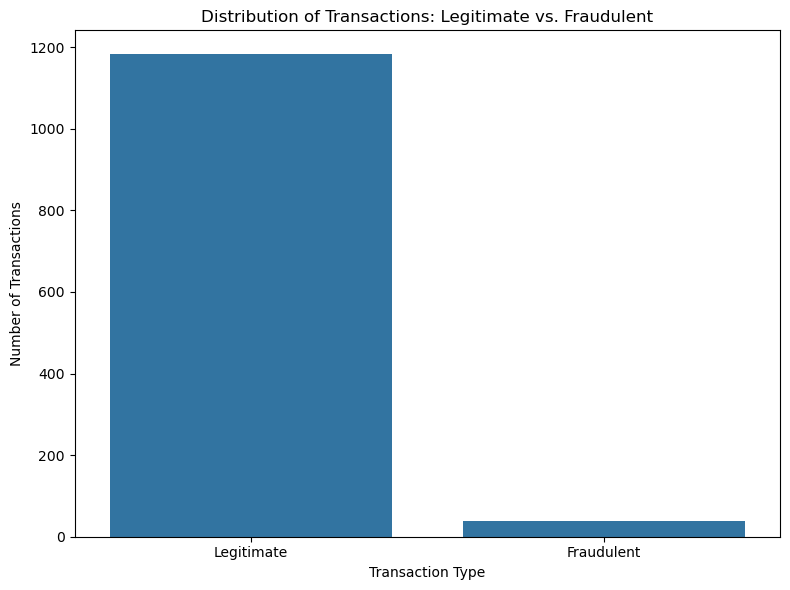

In [82]:
# Count the number of fraudulent and legitimate transactions
fraud_counts = df_temp['fraud_flag'].value_counts().reset_index()

# Name the columns for clarity in the plot
fraud_counts.columns = ['is_fraudulent', 'count']

# Map the boolean values to descriptive labels
fraud_counts['is_fraudulent'] = fraud_counts['is_fraudulent'].map({False: 'Legitimate', True: 'Fraudulent'})

# Create a bar plot to visualize the distribution
plt.figure(figsize=(8, 6))
sns.barplot(data=fraud_counts, x='is_fraudulent', y='count')

# Add descriptive labels and title
plt.title('Distribution of Transactions: Legitimate vs. Fraudulent')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

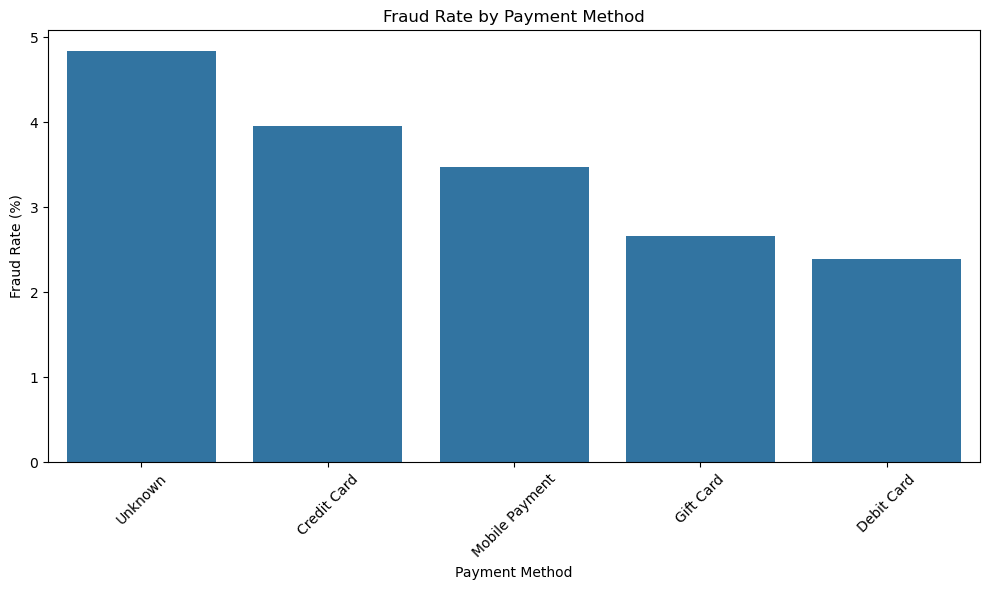

In [6]:
# Calculate total transactions and fraudulent transactions by payment method in one step
payment_method_data = df_temp.groupby('payment_method').agg(
    total_transactions=('transaction_id', 'count'),
    fraud_transactions=('fraud_flag', 'sum')
).reset_index()

# Calculate the fraud rate as a percentage
payment_method_data['fraud_rate'] = (payment_method_data['fraud_transactions'] / payment_method_data['total_transactions']) * 100
payment_method_data.sort_values(by='fraud_rate',ascending=False, inplace=True)

# Create a bar plot to visualize the fraud rate
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_method_data, x='payment_method', y='fraud_rate')

# Add descriptive titles and labels
plt.title('Fraud Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

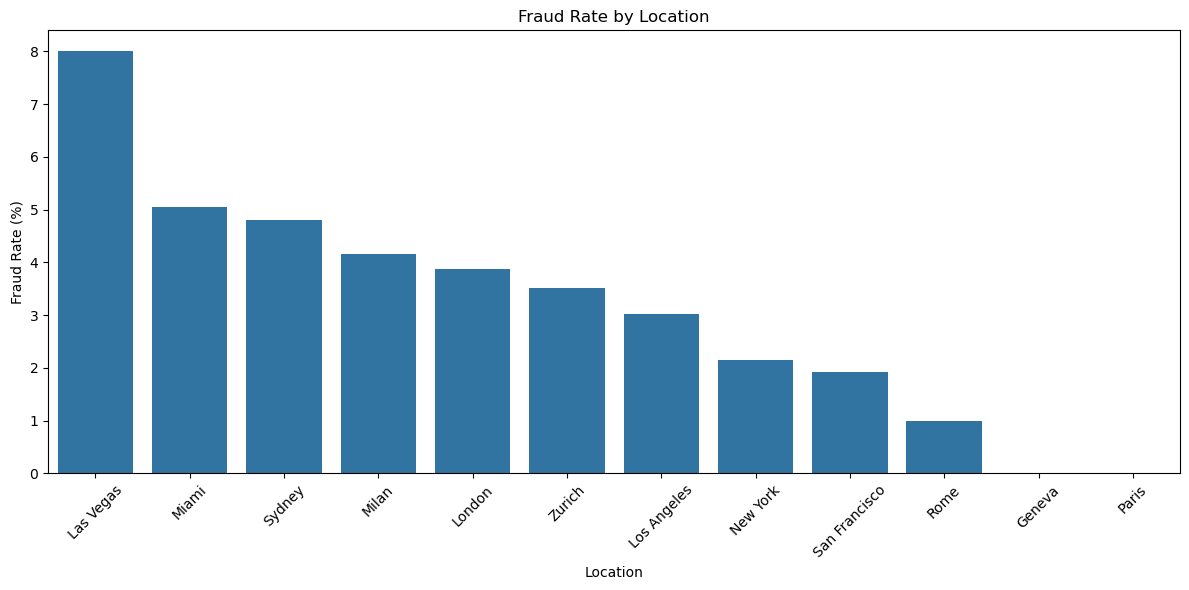

In [8]:
# Calculate total transactions and fraudulent transactions by location in one step
location_data = df_temp.groupby('location').agg(
    total_transactions=('transaction_id', 'count'),
    fraud_transactions=('fraud_flag', 'sum')
).reset_index()

# Calculate the fraud rate as a percentage
location_data['fraud_rate'] = (location_data['fraud_transactions'] / location_data['total_transactions']) * 100

# Sort the data by fraud rate in descending order for a clearer bar chart
location_data.sort_values(by='fraud_rate', ascending=False, inplace=True)

# Create a bar plot to visualize the fraud rate
plt.figure(figsize=(12, 6))
sns.barplot(data=location_data, x='location', y='fraud_rate')

# Add descriptive titles and labels
plt.title('Fraud Rate by Location')
plt.xlabel('Location')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

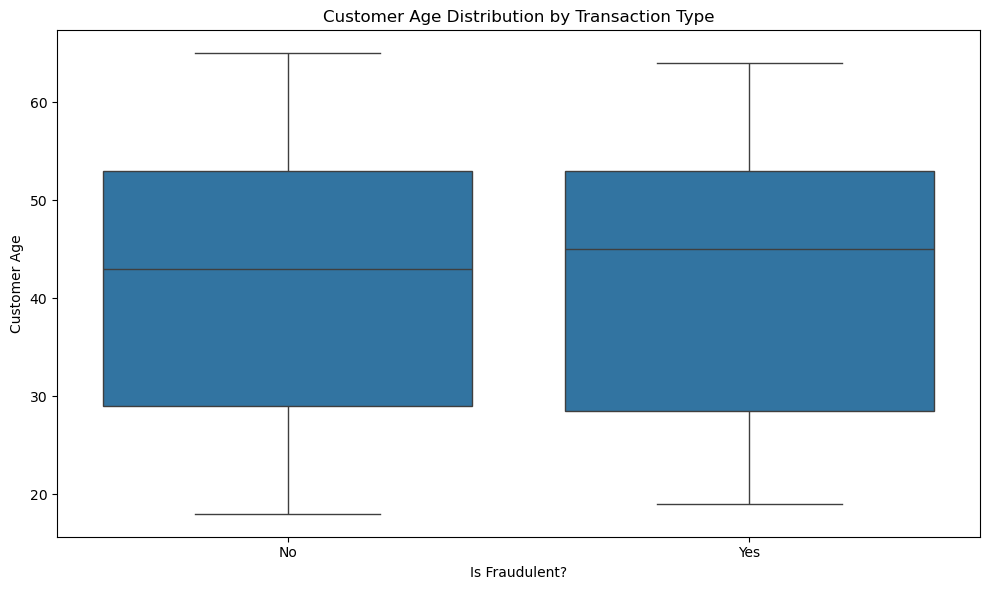

In [9]:
# Create a box plot to compare the age distribution for each transaction type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_flag', y='customer_age', data=df_temp)

# Add descriptive labels and titles
plt.title('Customer Age Distribution by Transaction Type')
plt.xlabel('Is Fraudulent?')
plt.ylabel('Customer Age')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.tight_layout()
plt.show()